# Smile Detection using HoG features

A project to implement a classifier to detect emotions on human faces. The training data had 2 classes, Smiling or Not Smiling. I trained an SVM classifier using HoG features extracted from image samples.

Achieved an F1 score of 0.79

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json

from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

## Importing data

In [2]:
#Reading raw data
data = pd.read_csv("input.csv")

## Data Preprocessing

In [3]:
#Splitting raw data into train and test
data_train = data[data.Usage == 'Training']
data_public_test = data[data.Usage == 'PublicTest']
data_private_test = data[data.Usage == 'PrivateTest']

In [4]:
def data_split(dataframe):
    #numpy array with pixel values split
    pixels_copy = np.array(dataframe.pixels.str.split(' ').tolist()).astype('uint8')
    
    n = np.empty(shape = (len(pixels_copy),48,48))
    for x in range(len(pixels_copy)):
        n[x] = pixels_copy[x].reshape(48,48).transpose([0,1])
        
    data_series = np.array(n)
    label_series = np.array(dataframe.iloc[:,0])
    
    return(data_series, label_series)

In [5]:
#Train and Test sets with pixels split
X_train, Y_train = data_split(data_train)
X_public_test, Y_public_test = data_split(data_public_test)
X_private_test, Y_private_test = data_split(data_private_test)

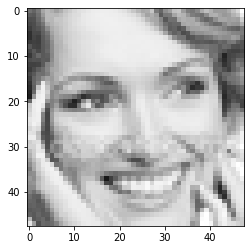

In [6]:
plt.imshow(X_train[28687], cmap='gray', vmin=0, vmax=255)

## HoG feature extraction

In [7]:
#HoG feature extraction
def do_features(x_test, y_test):
    ppc = 8
    hog_images = []
    hog_features = []
    fd = []
    hog_image = []
    for image in x_test:
        fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2-Hys',visualise=True)
        hog_images.append(hog_image)
        hog_features.append(fd)
        
    return(hog_features, hog_images, y_test)

In [8]:
X_hog_train, hog_train_images, Y_hog_train = do_features(X_train, Y_train)
X_hog_public_test, hog_public_test_images, Y_hog_public_test = do_features(X_public_test, Y_public_test)
#X_hog_private_test, hog_private_test_images, Y_hog_private_test = do_features(X_private_test, Y_private_test)

/Users/MrVarma/anaconda3/lib/python3.7/site-packages/skimage/feature/_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


800


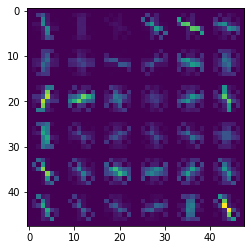

In [9]:
plt.imshow(hog_train_images[28687])
print(len(X_hog_train[28687]))

## SVM Classifier

In [10]:
clf = svm.SVC()

In [11]:
clf.fit(X_hog_train,Y_hog_train)

/Users/MrVarma/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
y_pred = clf.predict(X_hog_public_test)

## Model Evaluation

In [13]:
print("Accuracy: ",(accuracy_score(Y_hog_public_test, y_pred)))
print('\n')
print(classification_report(Y_hog_public_test, y_pred))

Accuracy:  0.7901922541097799


              precision    recall  f1-score   support

           0       0.78      0.99      0.88      2694
           1       0.91      0.18      0.30       895

    accuracy                           0.79      3589
   macro avg       0.85      0.59      0.59      3589
weighted avg       0.82      0.79      0.73      3589



In [89]:
y_train_pred = clf.predict(X_hog_train)
print("Accuracy: ",(accuracy_score(Y_hog_train, y_train_pred)))
print('\n')
print(classification_report(Y_hog_train, y_train_pred))

Accuracy:  0.7880803929081472


              precision    recall  f1-score   support

           0       0.78      0.99      0.88     21494
           1       0.89      0.18      0.30      7215

    accuracy                           0.79     28709
   macro avg       0.84      0.59      0.59     28709
weighted avg       0.81      0.79      0.73     28709



In [88]:
np.savetxt('HoG_features.csv', X_hog_train, fmt = '%.6f', delimiter = ',')

In [87]:
test_label = list(data_public_test.index)
output = np.array((y_pred, test_label), dtype = 'int').T

np.savetxt("Output.csv", output, fmt = '%i', delimiter = ',')